✅ Dataset downloaded to: /home/381abdcd-b45e-4197-a5ad-e7c852cde7e8/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1
📂 Using image data from: /home/381abdcd-b45e-4197-a5ad-e7c852cde7e8/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification
✅ Class folders: ['paper', 'brown-glass', 'clothes', 'battery', 'plastic', 'green-glass', 'white-glass', 'biological', 'trash', 'cardboard', 'shoes', 'metal']
Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.
✅ Classes loaded: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


/tmp/ipykernel_349/714912708.py:68: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()


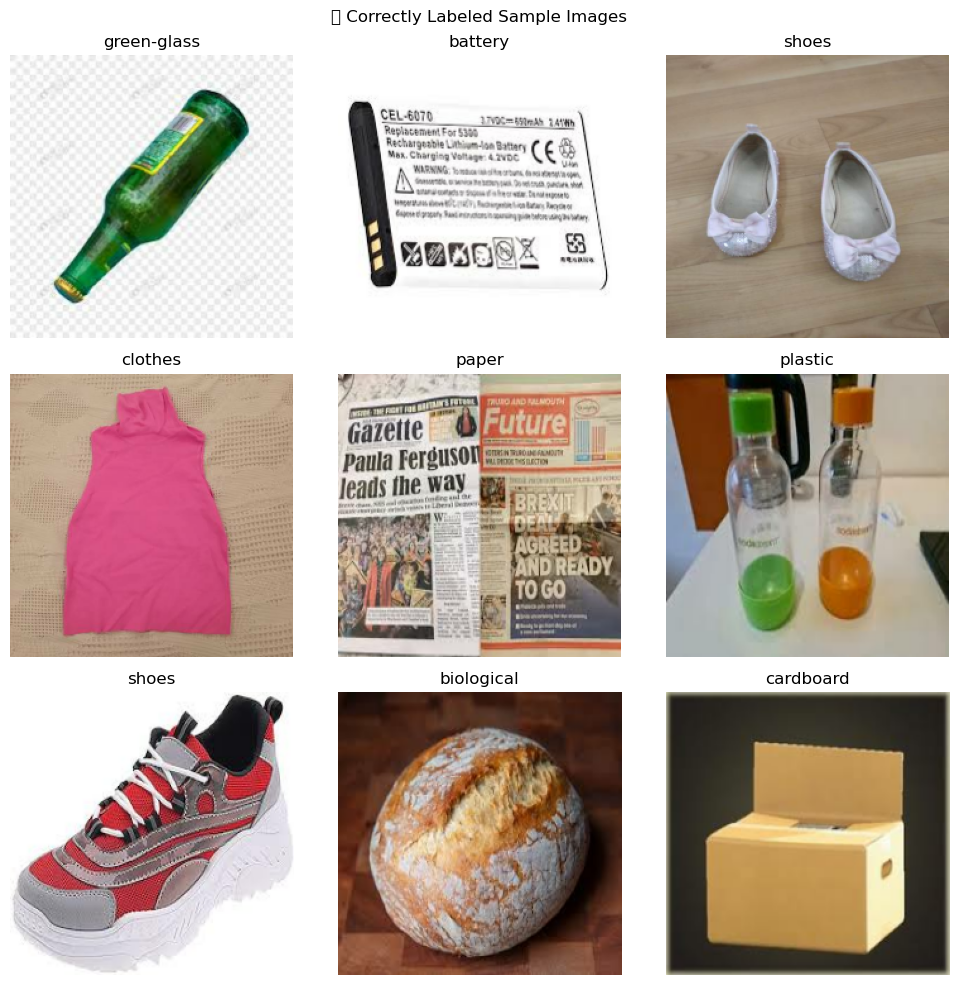

/tmp/ipykernel_349/714912708.py:85: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


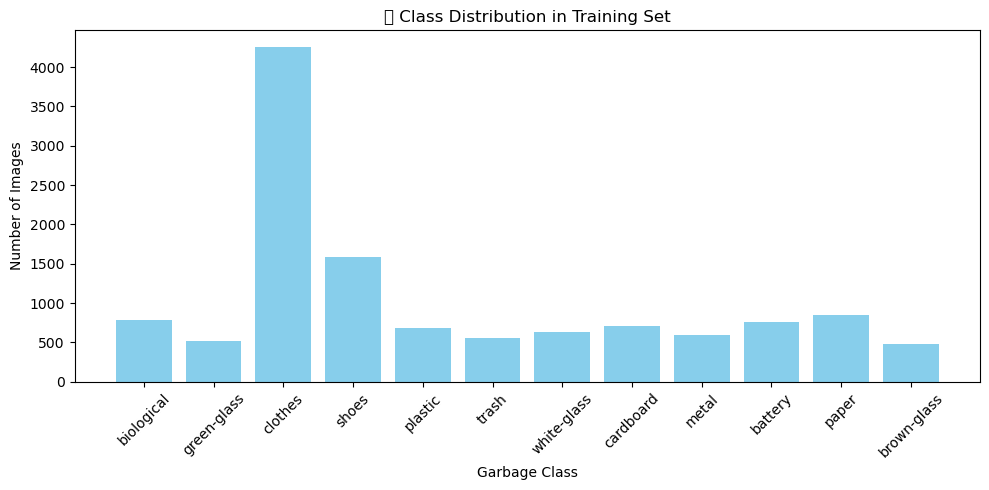

In [7]:
# ✅ STEP 1: Install Required Packages
!pip install -q kagglehub tensorflow matplotlib

# ✅ STEP 2: Set Kaggle Credentials
import os

os.environ['KAGGLE_USERNAME'] = 'saiprasad062006'
os.environ['KAGGLE_KEY'] = '5e097a2aa7a9a76256abb4d36cf78edc'

# ✅ STEP 3: Download Dataset Using kagglehub
import kagglehub

path = kagglehub.dataset_download("mostafaabla/garbage-classification")
print("✅ Dataset downloaded to:", path)

# ✅ STEP 4: Auto-detect class folder
def find_image_folder(root_path):
    for item in os.listdir(root_path):
        sub_path = os.path.join(root_path, item)
        if os.path.isdir(sub_path):
            sub_items = os.listdir(sub_path)
            if any(os.path.isdir(os.path.join(sub_path, x)) for x in sub_items):
                return sub_path
    return root_path

data_dir = find_image_folder(path)
print("📂 Using image data from:", data_dir)
print("✅ Class folders:", os.listdir(data_dir))

# ✅ STEP 5: Load Dataset (label_mode='int' is default)
import tensorflow as tf

image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("✅ Classes loaded:", class_names)

# 🔍 Preview 9 images with CORRECT labels (int format)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.suptitle("🔍 Correctly Labeled Sample Images")
plt.tight_layout()
plt.show()
# 📊 Plot correct label distribution (int labels)
from collections import Counter

label_counter = Counter()
for _, labels in train_ds:
    for label in labels.numpy():
        label_counter[class_names[label]] += 1

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(label_counter.keys(), label_counter.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Garbage Class")
plt.ylabel("Number of Images")
plt.title("📊 Class Distribution in Training Set")
plt.tight_layout()
plt.show()
